# Modelo de Regressão (CinemaTicketRef Dataset)

### Objetivo:
Tentar prever o preço total de vendas com base em outras variáveis

In [923]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)

df = pd.read_csv('datasets/cinematicket_ref.csv', sep=",", header=0)

display(df.head(10))

# removendo string data, pois so tem filmes de 2018, e temos month, quarter, day em outras colunas
df = df.drop(['date'], axis=1)


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.260000,150000.000000,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.080000,80000.000000,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.000000,80000.000000,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.010000,100000.000000,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.670000,80000.000000,15,89.982004,2018-05-05,5,2,5
5,1492,71,1050000,7,0,3,0.980000,150000.000000,7,714.285714,2018-05-05,5,2,5
6,1492,163,1020000,10,0,3,7.690000,102000.000000,10,130.039012,2018-05-05,5,2,5
7,1492,450,750000,5,0,3,1.570000,150000.000000,5,318.471338,2018-05-05,5,2,5
8,1492,51,750000,11,0,2,0.950000,68181.818182,11,1157.894737,2018-05-05,5,2,5
9,1492,522,600000,4,0,3,1.550000,150000.000000,4,258.064516,2018-05-05,5,2,5


In [924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  month         142524 non-null  int64  
 11  quarter       142524 non-null  int64  
 12  day           142524 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 14.1 MB


In [925]:
display(df.describe())

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,12347275.407531,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,30654858.289367,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,20000.000000,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1260000.000000,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3720000.000000,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,11100000.000000,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1262819994.000000,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


### Tratamento de dados

procurando celulas vazias

In [926]:

missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print('porcentagem de valores faltando', (total_missing/total_cells) * 100)

print(df.isnull().sum())

porcentagem de valores faltando 0.013493004147209754
film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
month             0
quarter           0
day               0
dtype: int64


preenchendo as celulas vazias com a media de cada coluna

In [927]:
# vamos preencher celulas vazias com a media de cada coluna

mean_occurrence = df['occu_perc'].mean()
mean_capacity = df['capacity'].mean()

df['occu_perc'].fillna(mean_occurrence, inplace=True)
df['capacity'].fillna(mean_capacity, inplace=True)

print(df.isnull().sum())

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
month           0
quarter         0
day             0
dtype: int64


procurando valores repetidos

In [928]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print(df.duplicated().sum())


106
0


Histograma dos dados

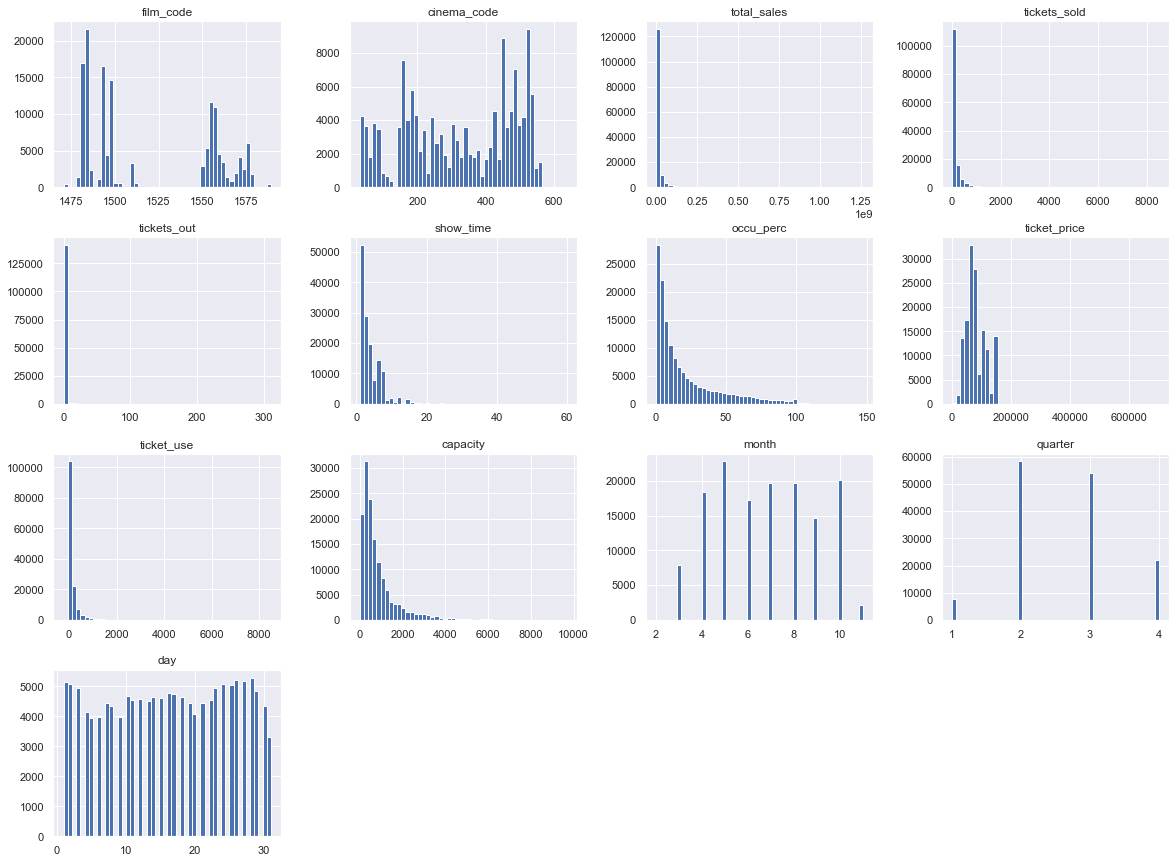

In [929]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Quantidade de 0s

In [930]:
df.lt(0).sum()

film_code        0
cinema_code      0
total_sales      0
tickets_sold     0
tickets_out      0
show_time        0
occu_perc        0
ticket_price     0
ticket_use      61
capacity        54
month            0
quarter          0
day              0
dtype: int64

### Boxplots

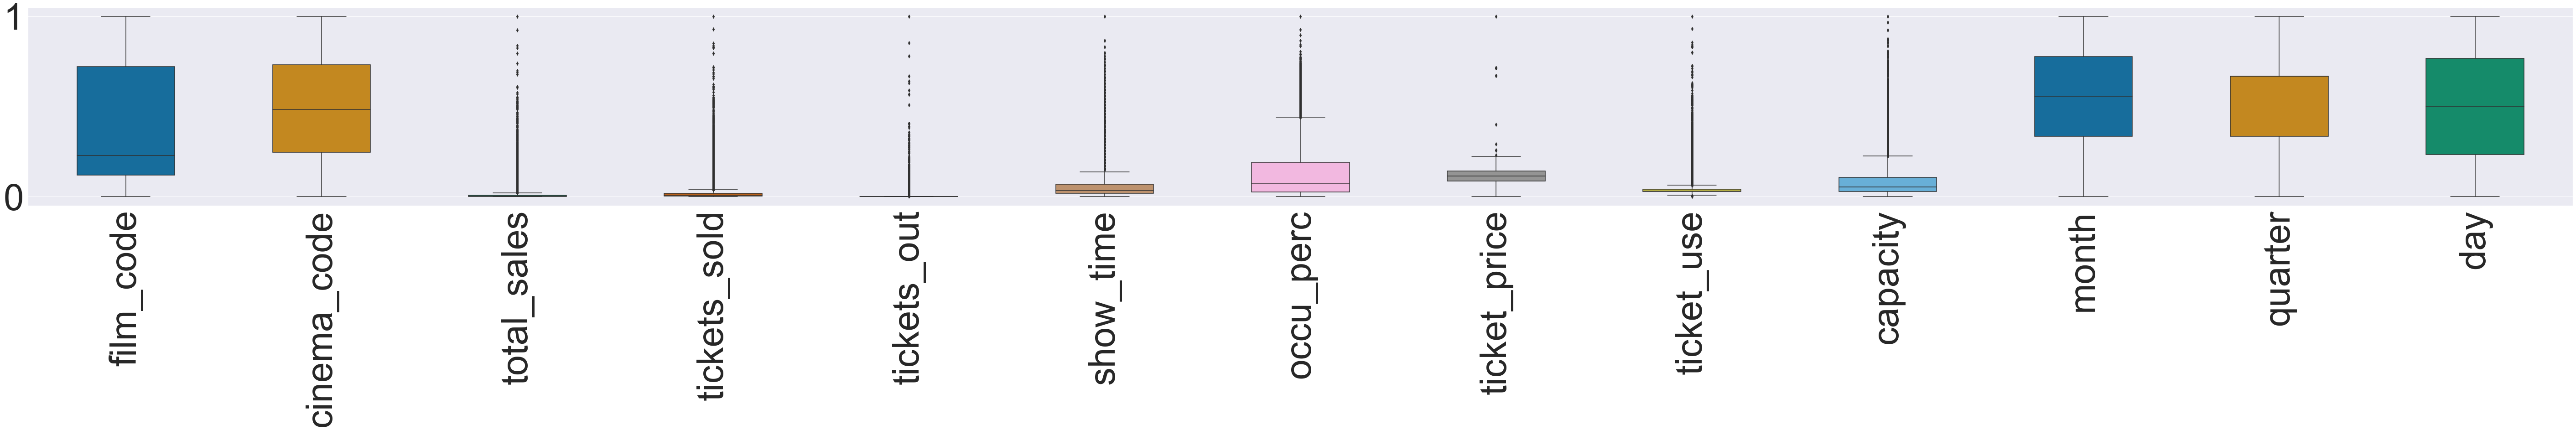

In [931]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

f, ax = plt.subplots(figsize=(100, 8))
bp = sns.boxplot(data=scaled_df, width=0.5, palette="colorblind")
plt.setp(bp.get_xticklabels(), rotation=90)
bp.tick_params(labelsize=80)

### Matriz de correlação

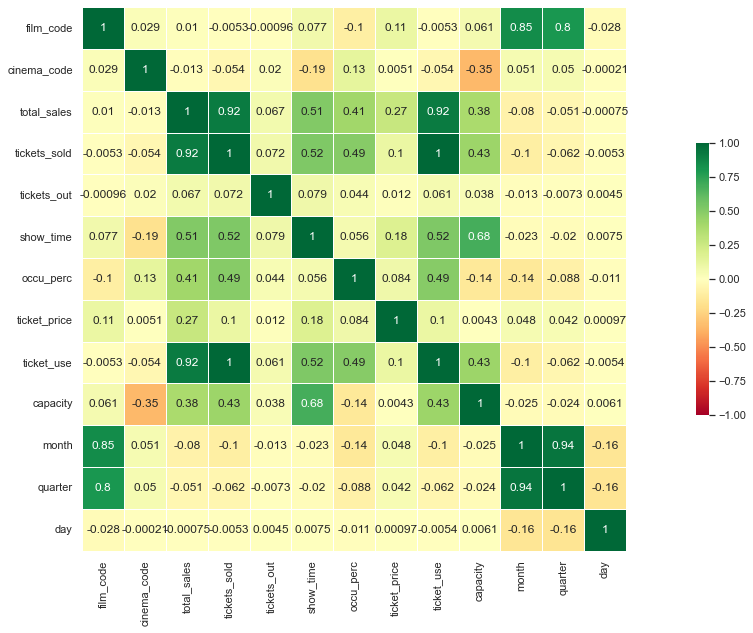

In [932]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 10))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', vmax=1,
        vmin=-1, center=0, square=True,
        linewidth=.5, cbar_kws={"shrink":.5})

plt.show()


### Removendo Ticket_use pela sua multicolinearidade

In [933]:
df = df.drop(['ticket_use'], axis=1)
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,month,quarter,day
0,1492,304,3900000,26,0,4,4.260000,150000.000000,610.328638,5,2,5
1,1492,352,3360000,42,0,5,8.080000,80000.000000,519.801980,5,2,5
2,1492,489,2560000,32,0,4,20.000000,80000.000000,160.000000,5,2,5
3,1492,429,1200000,12,0,1,11.010000,100000.000000,108.991826,5,2,5
4,1492,524,1200000,15,0,3,16.670000,80000.000000,89.982004,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.860000,60000.000000,569.948187,11,4,4
142520,1569,474,1200000,15,0,1,65.220000,80000.000000,22.999080,11,4,4
142521,1569,524,1060000,8,0,3,9.200000,132500.000000,86.956522,11,4,4
142522,1569,529,600000,5,0,2,5.000000,120000.000000,100.000000,11,4,4


# 

### Fazendo a normalização

In [934]:
# scaler = MinMaxScaler()

# for col in df.columns:
#     df[col] = scaler.fit_transform(df[[col]])

# display(df.describe())

In [935]:
cinema={}
# cinema["features"] = np.hstack([df.values[::, :2], df.values[::, 3:]])
# cinema["target"] = df.values[:, 2]

cinema["features"] = df[['tickets_sold', 'tickets_out', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']]
cinema["target"] = df['total_sales']

print(cinema['features'].shape)
print(cinema['target'].shape)

display(cinema['features'])
display(cinema['target'])

(142418, 8)
(142418,)


,tickets_sold,tickets_out,show_time,occu_perc,capacity,quarter,month,day
0,26,0,4,4.260000,610.328638,2,5,5
1,42,0,5,8.080000,519.801980,2,5,5
2,32,0,4,20.000000,160.000000,2,5,5
3,12,0,1,11.010000,108.991826,2,5,5
4,15,0,3,16.670000,89.982004,2,5,5
...,...,...,...,...,...,...,...,...
142519,22,0,2,3.860000,569.948187,4,11,4
142520,15,0,1,65.220000,22.999080,4,11,4
142521,8,0,3,9.200000,86.956522,4,11,4
142522,5,0,2,5.000000,100.000000,4,11,4


0         3900000
1         3360000
2         2560000
3         1200000
4         1200000
           ...   
142519    1320000
142520    1200000
142521    1060000
142522     600000
142523     250000
Name: total_sales, Length: 142418, dtype: int64

Utilizando o modelo Gaussiano podemos observar que 68% do total sales fica de -18301689.16 a 42973469.84

In [936]:

print(df['total_sales'].describe())

print(np.mean(df['total_sales']) - np.std(df['total_sales']))
print(np.mean(df['total_sales'] + np.std(df['total_sales'])))

count       142418.000000
mean      12335890.338223
std       30637687.066136
min          20000.000000
25%        1260000.000000
50%        3710000.000000
75%       11100000.000000
max     1262819994.000000
Name: total_sales, dtype: float64
-18301689.165172342
42973469.841500685


### Observando mais sobre o total sales

<AxesSubplot:xlabel='total_sales', ylabel='Count'>

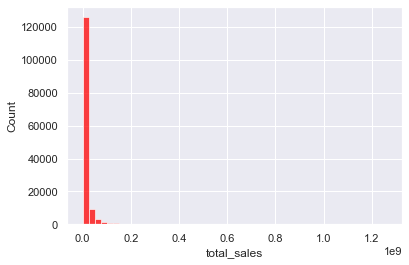

In [937]:
sns.histplot(df['total_sales'],color='red', bins=50)

### Aplicando Regressão linear

Mean squared error: 138171736744050.80
Mean absolute error: 4730699.57
Coefficient of determination: 0.85
Coefficients: 
 [  102940.47143956     3305.37779037   847807.8184638    -88295.72813026
    -3001.86810615 -1687680.02910328   692916.12547558    10418.04731822]
Intercept: 
 -1530069.4211609997
Score: 
 0.8501799615979517
scores: 
 [0.84181893 0.85118198 0.85062418 0.85370962 0.83082407 0.87353857
 0.84093328]
scores mean:  0.8489472334940941
scores std:  0.01241373552995957


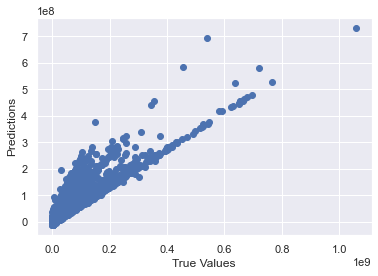

In [938]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

# train the model
model = LinearRegression()
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


# print the coefficients
print('Coefficients: \n', model.coef_)
# print the intercept
print('Intercept: \n', model.intercept_)
# print the score
print('Score: \n', model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_test, y_test, cv=7, scoring='r2')
print('scores: \n', scores)

print('scores mean: ', scores.mean())
print('scores std: ', scores.std())

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


### Utilizando outros modelos de Regressão Linear para verificar o resultado

In [939]:
def norma_l2(X):
    X = X.astype(int)
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

### Lasso Regression

In [940]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)
ls_scores = cross_val_score(ls, norma_l2(cinema["features"]), cinema["target"], cv=7)

print('ls score: ', ls_scores.mean())


ls score:  0.8163326913841275


### Ridge Regression

In [941]:
from sklearn.linear_model import Ridge


rg = Ridge(alpha=0.05)
lr = LinearRegression()

lr_scores = cross_val_score(lr, norma_l2(cinema["features"]), cinema["target"], cv=7,)
print(lr_scores)
print('lr mean scores: ', lr_scores.mean())

rg_scores = cross_val_score(rg, norma_l2(cinema["features"]), cinema["target"], cv=7)
print('rg mean scores: ', rg_scores.mean())

from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rg.fit(norma_l2(cinema["features"]), cinema["target"])

print('rg alpha: ', rg.alpha_)

[0.82944865 0.77075681 0.81174352 0.86959406 0.84532882 0.76232191
 0.82513441]
lr mean scores:  0.8163325949003007
rg mean scores:  0.8149784886175794
rg alpha:  0.00025


### ElasticNet Regression

In [942]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en = ElasticNet(alpha=0.001, l1_ratio=0.8)
en_scores = cross_val_score(en, norma_l2(cinema["features"]), cinema["target"], cv=10)

print('ElasticNet mean scores: ',en_scores.mean())

encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8))
encv.fit(norma_l2(cinema["features"]), cinema["target"])

print(encv.alpha_)
print(encv.l1_ratio_)

ElasticNet mean scores:  0.008708373739939369
0.001
0.8


### Regressões não lineares